In [1]:
import urllib
#import geojson
import json
import urllib.request as urllib2
import pandas as pd
import csv
import sys
import math
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

import colorama
from colorama import Fore

import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

# CESMD USER QUERY NOTEBOOK (Earthquake, Station, Records)
### - **Default format is CSV for events and station parts, record is using json format. you can change in the code**

### **Parameters and description**

| Parameters ||Description |  ||
| :- | -: || -: | -: | 
|Circle||Return events within a given distance (in kilometers) of a location|
|Coordinates||Return stations within a range of latitudes or longitudes|
|Country/State||Return events in a given country or U.S. state|
|Date/Time||Search by date and time (in UTC) in yyyy-mm-dd hh:mm:ss format|
|Earthquake Name||May contain the nearby city to the epicenter. A search for a nearby city returns events whose earthquake name contains the name of the nearby city. |
|Epicentral Dist. (km)||Specify an epicentral distance range (min to max inclusive) to narrow down search criteria|
|Event IDs||Search event(s) by ID(s), e.g. CI37904927,CI38043999. Most other options are unavailable when an event ID is specified. |
|Fault Type||Return events with specific fault type. Multiple fault types may be selected for the search. Leaving them unselected will search for all possible types. |
|Group By||Specify the grouping of the metadata. Default is grouping by stations. Grouping by stations will group records under the same station into a single data structure. |
|Include Inactive Stations||Check to include inactive stations in search criteria, uncheck otherwise. |
|Login Email||Available if dataset is selected as the return type. Registered e-mail must be provided in order to download data files. |
|Metadata Format||Specify output format. Default is JSON. Available if metadata is selected as the return type. |
|Magnitude||Self-explanatory. Returns events within a range of magnitudes. Default returns all magnitude ranges|
|Network||Two letter Network ID of station (multiple network IDs can be listed, e.g. CE,AA) |
|Order Records By||Specifies the sort order of the record output. Default is by epicentral distance (descending). |
|PGA (g)||Specify a PGA range (min to max inclusive) to narrow down search criteria|
|Processed, Raw, Plot||Available if dataset is selected as the return type. Checking processed and raw will package both processed and raw data in the returned (.ZIP) file. |
|Return Type||Return type of the output. Dataset will return a (.ZIP) file packaged with the requested data. Metadata will return either (.JSON) or (.XML), depending on user selection. |
|Station Code(s)||Search station(s) by code(s), e.g. CE24319,AAAK16. Most other options are unavailable when a station code is specified. |
|Station Name||Name of station, accepts wildcards|
|Station Type||Default is Any, alternative options are Array, Ground, Building, Bridge, Dam, Tunnel, Wharf, Other|


## **Part1: Earthquake**
### Possible input:
- Event ID:
- Data:
- Magnitude:
- Location:
    - Country: 
        - ["United States","British Virgin Islands","Canada","Chile",
        "Costa Rica","Cuba","Ecuador", "Guatemala","Haiti","Indonesia","Italy",
        Japan","Kermadec Islands","Mexico","Nepal","New Zealand","Papua New Guinea",
        "Puerto Rico","Solomon Islands","Spain", "Taiwan", "Tonga","Turkey","Vanuatu"]
     - United States States:
                ["AK","AR","CA","DE","HI","ID","IL","KS","MT","NV","OK","OR","SC","VA","WA"]
    - Geography Map Location: 
        - Coordinates:
                min and max Latitude and Longtitude 
        - Circle: 
                center point (lat, long) and radius in unit (km)
- Format: geojson, csv, xml (csv is default for this example)


In [2]:
country_list = ["US","British Virgin Islands","Canada","Chile",
        "Costa Rica","Cuba","Ecuador", "Guatemala","Haiti","Indonesia","Italy",
        "Japan","Kermadec Islands","Mexico","Nepal","New Zealand","Papua New Guinea",
        "Puerto Rico","Solomon Islands","Spain", "Taiwan", "Tonga","Turkey","Vanuatu"]
state_list = ["AK","AR","CA","DE","HI","ID","IL","KS","MT","NV","OK","OR","SC","VA","WA"]

In [3]:
# Start with create the query url
def earthquake_parameter(url):
    # Start enter the input and check the format to make url
    print("For the following question, please follow the instructions or skip by pushing the 'return' button. Thanks!\n")
    #
    minmag= input('Min magnitude   (a number between 0~10):')
    maxmag= input('Max magnitude   (a number between 0~10, greater than min magnitude):')
    startdate= input('Enter a start date (ex.2021-08-25, 2021-08-14T11:57:43.715Z):')    
    enddate=input('Enter a end date (ex.2021-08-25, 2021-08-14T11:57:43.715Z, later than start date):')

    
    # Eroor Handeling
    if minmag != '' and float(minmag):
        url = url+'&minmag='+minmag
    else: 
        print(Fore.RED +'No min magnitude or input is not a number.')
        

    if maxmag != '' and float(maxmag):
        if minmag == '' or float(maxmag) >= float(minmag):
            url = url+'&maxmag='+maxmag
        else:
            print(Fore.RED +'Max magnitude is not a number.')
    else: 
        print(Fore.RED +'No max magnitude.')

    if startdate != '':
        url = url+'&startdate='+startdate
    else: 
        print(Fore.RED +'No input startdate.')

    if enddate != '':
        url = url+'&enddate='+startdate
    else: 
        print(Fore.RED +'No input startdate.')    
        

    #orderby=time
    #format=csv
    print(url)
    return url


In [4]:
# By Country
def earthquake_country(url):
    print('Country List:\n',country_list)
    country= input('What is the country?')  
    if country != '':
        url = url+'&country='+country
        print('State List:\n',state_list)
        state= input('what is the state?') 
        if state != '':
            url = url+'&state='+state
        else: 
            print('No input state.')
    else: 
        print('No input country.')    
    print(url)
    return url

In [5]:
# By Circle
def earthquake_country_circle(url):
    latitue = input('Latitude at circle center')  
    longitude = input('Longitude at circle center')
    radius = input ('Radius(km) from circle center')
    if  latitue and longitude and radius: 
        url = url+f'&lat={latitue}&lon={longitude}&rad={radius}'
        print(url)
    else:
        print(Fore.RED + 'You may missing at least one parameter, the url will not contain the circle query')
        print(url)
    return url

In [6]:
# By Coordinates
def earthquake_Coordinates(url):
    minlat=input('Min Latitude') 
    maxlat=input('Max Latitude') 
    minlon=input('Min Longitude')
    maxlon=input('Max Longitude')
    
    if  minlat and maxlat and minlon and maxlon: 
        url = url +f'&minlat={minlat}&maxlat={maxlat}&minlon={minlon}&maxlon={maxlon}'
        print(url)
    else:
        print(Fore.RED + 'You may missing at least one parameter, the url will not contain the coordinates query')
        print(url)
    return url


In [7]:
def open_url(url):
    data = pd.DataFrame()
    try:
        data = pd.read_csv(url, sep="|", engine="python", skiprows=4)

    except:
        print(Fore.RED +'URL show Eroor, please check inputs')
    return data

In [13]:
def query_earthquake(url):
    event_id = input('Do you have an id number? (Yes/No)')
    # event id is the primary 
    if  event_id.lower() == 'yes':
        id_ = input('Event ID:')
        url = url +f'&eventid={id_}'
    # parameters and location to the url 
    else:
        query = input('\nDo you want to query by parameters, location, or both? (parameters/location/both)')
        if query.lower() == 'parameters':
            url = earthquake_parameter(url)
        elif query.lower() == 'location':
            e,s='',''
            loc_type= input('Do you want to query by country, circle or coordination?')
            if loc_type.lower().lower() == 'country':
                url = earthquake_country(url)
            elif loc_type.lower() == 'circle':
                url =  earthquake_country_circle(url)
            elif loc_type.lower() == 'coordination':
                url = earthquake_Coordinates(url)
            else:
                print(Fore.RED+'No input for location')
        elif query.lower() == 'both':
            url = earthquake_parameter(url)
            loc_type= input('Do you want to query by country, circle or coordination?')
            if loc_type.lower() == 'country':
                url = earthquake_country(url)
            elif loc_type.lower() == 'circle':
                url =  earthquake_country_circle(url)
            elif loc_type.lower() == 'coordination':
                url = earthquake_Coordinates(url)
            else:
                print('No input for location')
        else:
            print(Fore.RED +('Unknow input, you may need try again if the url is not working'))
    if url == 'https://www.strongmotioncenter.org/wserv/events/query?&orderby=time&format=csv&nodata=404':
        print(Fore.RED +'You must enter at least one parameter! Try Again.')
    
    return url 

# Query Event

In [15]:
# Sample Query URL 
url = 'https://www.strongmotioncenter.org/wserv/events/query?&orderby=time&format=csv&nodata=404' # initial url with csv format
event_url = query_earthquake(url)

Do you have an id number? (Yes/No) no

Do you want to query by parameters, location, or both? (parameters/location/both) both


For the following question, please follow the instructions or skip by pushing the 'return' button. Thanks!



Min magnitude   (a number between 0~10): 3.5
Max magnitude   (a number between 0~10, greater than min magnitude): 
Enter a start date (ex.2021-08-25, 2021-08-14T11:57:43.715Z): 
Enter a end date (ex.2021-08-25, 2021-08-14T11:57:43.715Z, later than start date): 


No max magnitude.
No input startdate.
No input startdate.
https://www.strongmotioncenter.org/wserv/events/query?&orderby=time&format=csv&nodata=404&minmag=3.5


Do you want to query by country, circle or coordination? circle
Latitude at circle center 38
Longitude at circle center -118
Radius(km) from circle center 500


https://www.strongmotioncenter.org/wserv/events/query?&orderby=time&format=csv&nodata=404&minmag=3.5&lat=38&lon=-118&rad=500


In [16]:
data = open_url(event_url)
print(data.describe())
data.head()

         Latitude   Longitude       Depth   Magnitude
count  953.000000  953.000000  953.000000  953.000000
mean    36.479578 -119.096716    6.718258    4.058342
std      1.707808    1.978766    4.412025    0.639751
min     33.503000 -123.486000   -1.900000    3.500000
25%     35.581000 -121.034000    3.200000    3.600000
50%     36.110800 -118.329000    6.500000    3.900000
75%     37.910700 -117.599000    9.100000    4.300000
max     41.986800 -114.654600   26.400000    7.500000


EventID Net_ID                  Time  Latitude  Longitude  Depth MagType  \
0  73620341     nc  2021-09-05T05:27:45Z   39.1430  -123.1192    9.8      MW   
1  73619336     nc  2021-09-03T05:44:20Z   39.1465  -123.1180    9.2      MW   
2  7000f6a0     us  2021-08-31T17:21:09Z   40.9205  -114.9459    8.7     MWW   
3  73618401     nc  2021-08-31T16:09:56Z   36.5780  -121.1798    9.0      MW   
4  40024128     ci  2021-08-27T12:34:51Z   35.5152  -118.3792    5.0      MW   

   Magnitude FaultingType  
0        3.7          NaN  
1        3.8          NaN  
2        4.7          NaN  
3        4.0          NaN  
4        3.9          NaN

### Plot the data in a map

In [17]:
# Create a map
lat_0=38.1
lon_0=-118
m_1 = folium.Map(location=[lat_0,lon_0], tiles='openstreetmap', zoom_start=3)
# Add points to the map
mc = MarkerCluster()
for idx, row in data.iterrows():
    if not math.isnan(row['Longitude']) and not math.isnan(row['Latitude']):
        mc.add_child(Marker([row['Latitude'], row['Longitude']]))
m_1.add_child(mc)

# Display the map
m_1

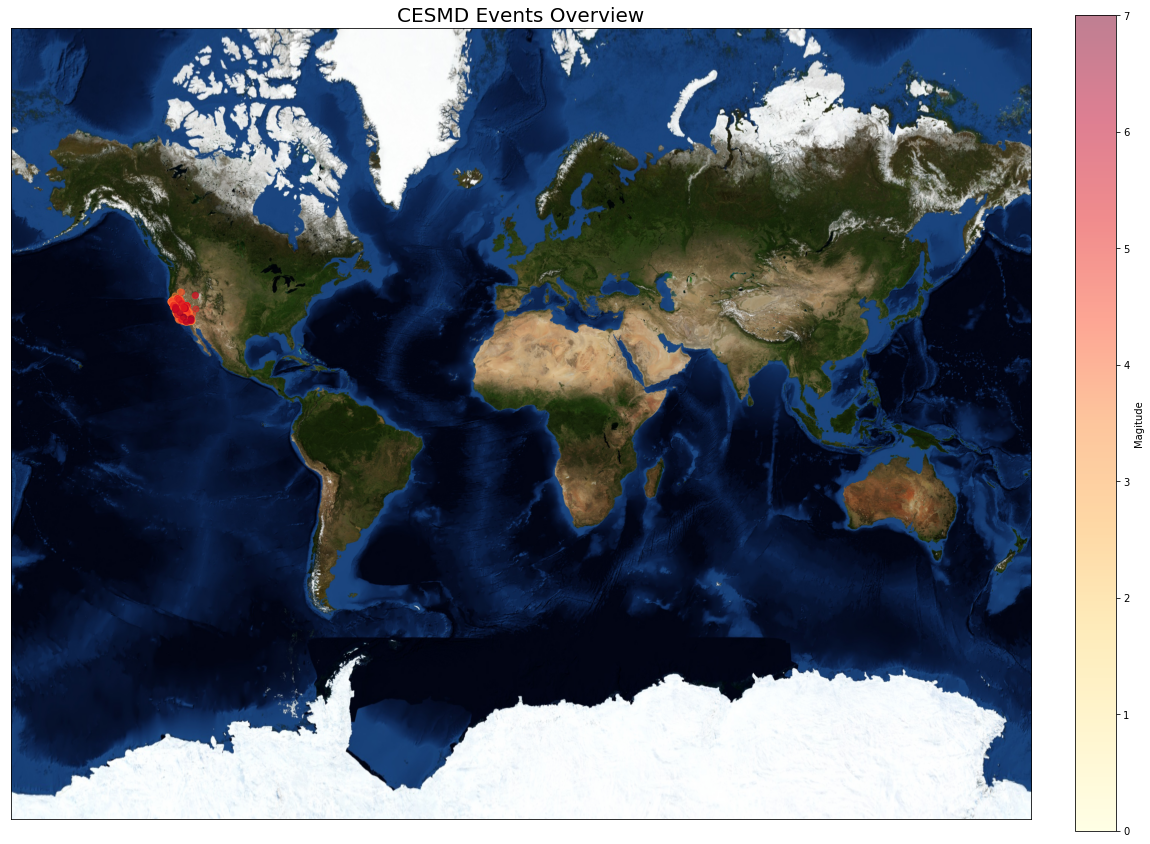

In [18]:
# setup Lambert Conformal basemap.
# set resolution=None to skip processing of boundary datasets.
fig = plt.figure(figsize=(20, 15))
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180,resolution='c')

lat_s = list(data.Latitude)
lon_s = list(data.Longitude)
mag_s = list(data.Magnitude)
m.scatter(lon_s, lat_s, latlon=True, 
          c=mag_s,
          cmap='YlOrRd', alpha=0.5)

plt.colorbar(label=r'Magitude',fraction=0.046, pad=0.04)
plt.clim(0, 7)
m.bluemarble()
plt.title("CESMD Events Overview", fontsize=20)
#plt.savefig('Final_Global.jpg', facecolor=fig.get_facecolor())

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


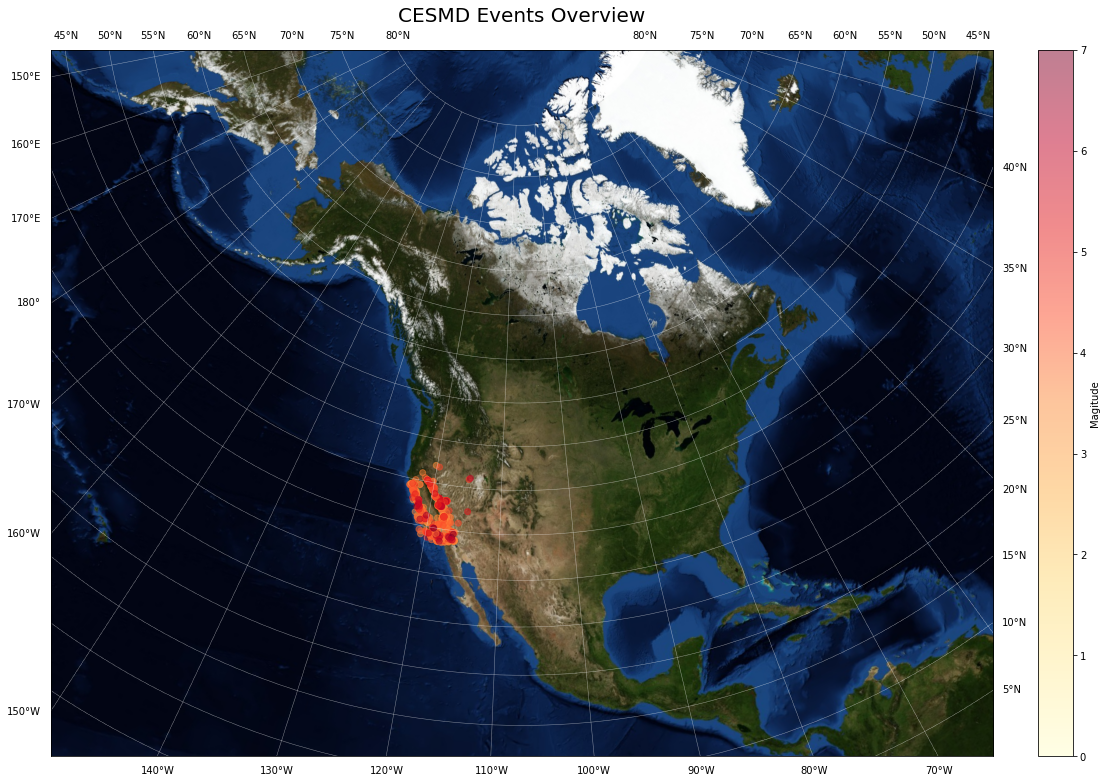

In [19]:
# setup Lambert Conformal basemap.
# set resolution=None to skip processing of boundary datasets.
fig = plt.figure(figsize=(20, 13))
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution=None,lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)

lat_s = list(data.Latitude)
lon_s = list(data.Longitude)
mag_s = list(data.Magnitude)
m.scatter(lon_s, lat_s, latlon=True, 
          c=mag_s,
          cmap='YlOrRd', alpha=0.5)


m.bluemarble()
parallels = np.arange(0.,81,5.)
# labels = [left,right,top,bottom]
m.drawparallels(parallels,labels=[False,True,True,False],color='white',linewidth=0.5)
meridians = np.arange(10.,351.,10.)
m.drawmeridians(meridians,labels=[True,False,False,True],color ='white',linewidth=0.5)

plt.colorbar(label=r'Magitude',fraction=0.046, pad=0.04)
plt.clim(0, 7)

plt.title("CESMD Events Overview\n", fontsize=20)
#plt.savefig('Event.jpg', facecolor=fig.get_facecolor())


plt.show()

# Part2: Station
### Possible input:
- **Station Name**:

- Network: (default is any)
| Network Code | Network Detail ||Network Code | Network Detail |
| :- | -: || -: | -: | 
|08 | Hokkaido University|	|AA | Anchorage Strong Motion Network|
|AK | University of Alaska Geophysical Institute|	|AZ | Anza|
|BG | Berkeley Geysers Network|	|BK | Berkeley Digital Seismic Network|
|C1 | Red Sismologica Nacional|	|CB | Institute of Geophysics China Earthquake Administration (IGP)|
|CE | California Strong Motion Instrumentation Program|	|CF | Red Acelerografica Nacional de la Comision Federal de Electr|	|CI | California Institute of Technology|
|CU | Albuquerque Seismological Laboratory|	|C_ | C&GS|
|EC | Ecuador Seismic Network|	|ES | Spanish Digital Seismic Network|
|GI | Red Sismologica Nacional Guatemala|	|G_ | GEOSCOPE|
|HV | Hawaiian Volcano Observatory Network|	|IT | Italian Strong Motion Network|
|IU | GSN  IRIS/USGS|	|IV | Istituto Nazionale di Geofisica e Vulcanologia|
|JP | BRI|	|JP | ERI|
|JP | KIKNET|	|JP | KNET|
|JP | PARI|	|LA | Los Angeles Basin Seismic Network|
|MN | Mediterranean Very Broadband Seismographic Network|	|NC | USGS Northern California Regional Network|
|ND | New Caledonia Broadband Seismic Network (SismoCal)|	|NM | New Madrid Seismic Network|
|NN | Nevada Seismic Network|	|NP | National Strong Motion Project|
|NZ|	|	|OK | Oklahoma Geological Survey|
|OV | Observatorio Vulcanologico y Sismologico de Costa Rica|	|PA | Observatorio Sismico del Occidente de Panamá|
|PG|	|	|PR | Puerto Rico Strong Motion Program (PRSMP)|
|TO | Caltech Tectonic Observatory|	|TU | Turkey Strong Motion Network|
|TU | National Seismic Network of Turkey|	|US | National Earthquake Information Center|
|UW | PNSN|	|WR | California Department of Water Resources|
|_C | NMI|	|_C|	|
|_C | University of Chile Santiago|	|_C | Chilean National Seismic Network|


- Station Type:
| Station Code | Station Detail |
| :- | -: |
|A|"Array"|  
|G|"Ground"|  
|B|"Building"|  
|Br|"Bridge"|  
|D|"Dam"|  
|T|"Tunnel"|  
|W|"Wharf"|  
|O|"Other"|


- VS30: 
    - &Vs30Method=true
    - vs30min=10&vs30max=30&Vs30Method=true
- Location:
    - Coordinates:
                min and max Latitude and Longtitude 
    - Circle: 
                center point (lat, long) and radius in unit (km)

In [20]:
net = ['08','ak','c1','ce','cu','ec', 'gi','hv','iu','jp','mn','nd','nn','nz','ov','pg','to','uw','_c','aa','az','bk','cb','cf','c_','es','g_','it','iv','la','nc','nm','np','ok','pa','pr','tu','us','wr']
sta = ['a','g','b','br','d','t','w','o']
net_code = sorted([each_string.upper() for each_string in net])
sta_code = sorted([each_string.upper() for each_string in sta])

In [24]:
# earthquake_country_circle(url):
# earthquake_Coordinates(url):
# Start with create the query url

def station_parameter(url):
    v30 = input('Do you want to enter VS30? (yes or no)')
    if v30 == 'yes':
        url = url+'&Vs30Method=true'
        min_v30 = input('Do you want to enter min VS30?')
        max_v30 = input('Do you want to enter max VS30?')
        if min_v30:
            url = url+'vs30min='+min_v30
        if max_v30:
            url = url+'vs30min='+max_v30 
        
    print("For station code, you can enter multiple code, sperate then by ','")
    print('Netcode:\n',net_code )
    network = input('Please enter the network code: ')
    a = [item.upper() for item in network.split(',')]
    check =  set(a).issubset(net_code)
 
    if check is True:
        url = url + f'&netid={network.upper()}'   
    else :
        for i in network.split(','):
            if i.upper() not in net_code:
                print(i,'is not in Database. The network code input will be ignored')
    print(check,url)

    print('Station Code\n', sta_code)
    station = input('Please enter a station code: ')
    if station.upper() in sta_code:
            url = url + f'&sttype={station.upper()}'
    else:
        print(station,'is not in Database. The staion code input will be ignored')

    station_name = input('Please enter a station name: ')
    if station_name:
        url = url + f'&stname={station_name}'
    print(url)
    return url


In [51]:
def station_query(url):
    print("For the following question, please enter follow the instructions or skip by push the 'return' button. Thanks!\n")
    station_name = input ('Do yo have station code/id? (Please enter yes or no)')
    if  station_name.lower() == 'yes':
        sta_id = input('Station code/id:')
        url = url +f'stcode{st_id}'
    else:
        query = input('Do you want to query by parameters, location, or both?   (parameters/location/both)')
        if query.lower() == 'parameters':
            url = station_parameter(url)
        elif query.lower() == 'location':
            loc_type= input('Do you want to query by circle or coordination?')
            if loc_type.lower() == 'circle':
                url =  earthquake_country_circle(url)
            elif loc_type.lower() == 'coordination':
                url = earthquake_Coordinates(url)
            else:
                print(Fore.RED +'Unknow input', url)
        elif query.lower() == 'both':
            url = station_parameter(url)
            loc_type= input('Do you want to query by circle or coordination?')
            if loc_type.lower() == 'country':
                url = earthquake_country(url)
            elif loc_type.lower() == 'circle':
                url =  earthquake_country_circle(url)
            elif loc_type.lower() == 'coordination':
                url = earthquake_Coordinates(url)
            else:
                print(Fore.RED +'Unknow input, try again',url)
        else:
            print('Unknow input, try again')
            
    if url == 'https://www.strongmotioncenter.org/wserv/stations/query?&format=csv&nodata=404':
        print('You must enter at least one parameter! Try Again.')
            
    return url
    

In [50]:
def sta_open_url(url):
    data = pd.DataFrame()
    try:
        data = pd.read_csv(url)

    except:
        print('URL show Eroor, please check inputs')
    return data

# Station Query

In [52]:
url = 'https://www.strongmotioncenter.org/wserv/stations/query?&format=csv&nodata=404'
sta = station_query(url)

For the following question, please enter follow the instructions or skip by push the 'return' button. Thanks!



Do yo have station code/id? (Please enter yes or no) no
Do you want to query by parameters, location, or both?   (parameters/location/both) parameters
Do you want to enter VS30? (yes or no) no


For station code, you can enter multiple code, sperate then by ','
Netcode:
 ['08', 'AA', 'AK', 'AZ', 'BK', 'C1', 'CB', 'CE', 'CF', 'CU', 'C_', 'EC', 'ES', 'GI', 'G_', 'HV', 'IT', 'IU', 'IV', 'JP', 'LA', 'MN', 'NC', 'ND', 'NM', 'NN', 'NP', 'NZ', 'OK', 'OV', 'PA', 'PG', 'PR', 'TO', 'TU', 'US', 'UW', 'WR', '_C']


Please enter the network code:  nc


True https://www.strongmotioncenter.org/wserv/stations/query?&format=csv&nodata=404&netid=NC
Station Code
 ['A', 'B', 'BR', 'D', 'G', 'O', 'T', 'W']


Please enter a station code:  g
Please enter a station name:  


https://www.strongmotioncenter.org/wserv/stations/query?&format=csv&nodata=404&netid=NC&sttype=G


In [53]:
sta_data = sta_open_url(sta)
sta_data.head()

Code Network  Status  Channels  Recorder_type  NumRecorders  Comm_code  \
0   AAS      NC  Active       NaN            NaN           NaN        NaN   
1   ABJ      NC  Active       NaN            NaN           NaN        NaN   
2   AFD      NC  Active       NaN            NaN           NaN        NaN   
3   AOH      NC  Active       NaN            NaN           NaN        NaN   
4  ASMB      NC  Active       NaN            NaN           NaN        NaN   

   Crl_orientation                 Name  Location  ... Vs30_info  Vs30_method  \
0              NaN          Arroyo Seco       NaN  ...       NaN          NaN   
1              NaN    Bob Jauregui Site       NaN  ...       NaN          NaN   
2              NaN  Forest Hills Divide       NaN  ...       NaN          NaN   
3              NaN                 Apbc       NaN  ...       NaN          NaN   
4              NaN       Slate Mountain       NaN  ...       NaN          NaN   

  Vs30_reference  Bldtype  Bldheight  \
0            NaN      NaN        NaN   
1            NaN      NaN        NaN   
2            NaN      NaN        NaN   
3            NaN      NaN        NaN   
4            NaN      NaN        NaN   

                                        Station_page  Geo_type  Coord_long  \
0  https://strongmotioncenter.org/cgi-bin/CESMD/s...     Point  -121.10959   
1  https://strongmotioncenter.org/cgi-bin/CESMD/s...     Point  -121.19299   
2  https://strongmotioncenter.org/cgi-bin/CESMD/s...     Point  -120.96897   
3  https://strongmotioncenter.org/cgi-bin/CESMD/s...     Point  -121.25767   
4  https://strongmotioncenter.org/cgi-bin/CESMD/s...     Point  -120.68499   

   Coord_lat      Id  
0   38.43014   NCAAS  
1   39.16577   NCABJ  
2   38.94596   NCAFD  
3   39.37627   NCAOH  
4   38.82365  NCASMB  

[5 rows x 26 columns]

In [54]:
# Create a map
lat_0=38.1
lon_0=-118
m_2 = folium.Map(location=[lat_0,lon_0], tiles='openstreetmap', zoom_start=3)
# Add points to the map
mc = MarkerCluster()
for idx, row in sta_data.iterrows():
    if not math.isnan(row['Coord_long']) and not math.isnan(row['Coord_lat']):
        mc.add_child(Marker([row['Coord_lat'], row['Coord_long']]))
m_2.add_child(mc)

# Display the map
m_2

# **URL Builder: Records in CESMD**
https://www.strongmotioncenter.org/wserv/records/builder/
- Require a registered email to query the data (if Return Type is dataset)
- In this notebook, default is **metadata**, format is **json**, **orderby=epidist-asc**. 
        Note: csv format may show error/empty)
- Make sure you understand all the parameters
- Try to use the preview two url to find the data

In [55]:
# event url = url+f'&elat={latitue}&elon={longitude}&erad={radius}' 
# station url = url+f'&slat={latitue}&slon={longitude}&srad={radius}'

In [56]:
# By Circle with sta ans event
def record_circle(url,e,s):
    latitue = input('Latitude at circle center')  
    longitude = input('Longitude at circle center')
    radius = input ('Radius(km) from circle center')  
    
    if  latitue and longitude and radius: 
        if e =="e":
            url = url+f'&elat={latitue}&elon={longitude}&erad={radius}'
            if s =="s":
                url = url+f'&slat={latitue}&slon={longitude}&srad={radius}'
                
        elif s =="s":
            url = url+f'&slat={latitue}&slon={longitude}&srad={radius}'
            
    else:
        print(Fore.RED + 'You may missing at least one parameter, the url will not contain the circle query')
    
    print(url)
    return url

In [57]:
# By Coordinates with sta ans event
def record_Coordinates(url,e,s):
    '''Enter the box for station or earthquake
    For record, there is a special marker for station (s), or event(e)'''
    minlat=input('Min Latitude') 
    maxlat=input('Max Latitude') 
    minlon=input('Min Longitude')
    maxlon=input('Max Longitude')    
    if  minlat and maxlat and minlon and maxlon: 
        if e =="e":
            url = url +f'&eminlat={minlat}&emaxlat={maxlat}&eminlon={minlon}&emaxlon={maxlon}'
            if s =="s":
                url = url +f'&sminlat={minlat}&smaxlat={maxlat}&sminlon={minlon}&smaxlon={maxlon}'
                
        elif s =="s":
            url = url +f'&sminlat={minlat}&smaxlat={maxlat}&sminlon={minlon}&smaxlon={maxlon}'
            

    else:
        print(Fore.RED + 'You may missing at least one parameter, the url will not contain the coordinates query')
        
    print(url)
    return url


In [58]:
def record_station_query(url):
    print("For the following question, please enter follow the instructions or skip by push the 'return' button. Thanks!\n")
    station_name = input ('Do yo have station code/id? (Please enter yes or no)')
    if  station_name.lower() == 'yes':
        sta_id = input('Station code/id:')
        url = url +f'stcode{st_id}'
    else:
        query = input('Do you want to query by parameters, location, or both?   (parameters/location/both)')
        if query.lower() == 'parameters':
            url = station_parameter(url)
        elif query.lower() == 'location':
            loc_type= input('Do you want to query by circle or coordination?')
            if loc_type.lower() == 'circle':
                url =  record_circle(url,e,s)
            elif loc_type.lower() == 'coordination':
                url = record_Coordinates(url,e,s)
            else:
                print(Fore.RED +'No location parameters')
        elif query.lower() == 'both':
            url = station_parameter(url)
            loc_type= input('Do you want to query by circle or coordination?')
            if loc_type.lower() == 'country':
                url = earthquake_country(url)
            elif loc_type.lower() == 'circle':
                url =  record_circle(url,e,s)
            elif loc_type.lower() == 'coordination':
                url = record_Coordinates(url,e,s)
            else:
                print(Fore.RED +'No location parameters')
        elif url == 'https://www.strongmotioncenter.org/wserv/stations/query?&format=csv&nodata=404':
            print(Fore.RED +'You must enter at least one parameter! Try Again.')
        else:
            print(Fore.RED +'Unknow input, try again')
            
        return url
    

In [59]:
def record_earthquake(url):
    print("For the following question, please enter follow the instructions or skip by push the 'return' button. Thanks!\n")
    event_id = input('Do you have an event id number? (Yes/No)')
    # event id is the primary 
    if  event_id.lower() == 'yes':
        id_ = input('Event ID:')
        url = url +f'&eventid={id_}'
    # parameters and location to the url 
    else:
        query = input('\nDo you want to query by parameters, location, or both? (parameters/location/both)')
        #1
        if query.lower() == 'parameters':
            url = earthquake_parameter(url) # query by event parameters function
        #2
        elif query.lower() == 'location':
            loc_type= input('Do you want to query by country, circle or coordination?')
            if loc_type.lower().lower() == 'country':
                url = earthquake_country(url)
            elif loc_type.lower() == 'circle':
                url =  record_circle(url,e,s)
            elif loc_type.lower() == 'coordination':
                url = erecord_Coordinates(url,e,s)
        #3
        elif query.lower() == 'both':
            url = earthquake_parameter(url)
            loc_type= input('Do you want to query by country, circle or coordination?')
            if loc_type.lower() == 'country':
                url = earthquake_country(url)
            elif loc_type.lower() == 'circle':
                url =  record_circle(url,e,s)
            elif loc_type.lower() == 'coordination':
                url = record_Coordinates(url,e,s)
            else:
                print('Unknow input, try again')
        elif url == 'https://www.strongmotioncenter.org/wserv/events/query?&orderby=time&format=csv&nodata=404':
            print('You must enter at least one parameter! Try Again.')
        else:
            print('Unknow input, try again')
    
    return url 

In [60]:
def record_query(url):
    print('Part 1: Output \nRequired parameter, please read and enter the inputs. Thanks!')
    groupby = input("Group by station or event:" )
    if not groupby:
        print("Please enter 'groupby' parameter to query the record")
        sys.exit('No required parameter! Please try agaain')
        
    else: 
        url = url +f'&groupby={groupby}'
        
        
    print("Part 2: Output \nRecord Parameters please read and enter the inputs or skip by 'return'. Thanks!")    
    minpga = input('Enter min PGA: (a number)')
    maxpga = input('Enter max PGA: (a number)')
    minepidist = input('Enter min Epicentral Dist. (km): ')
    maxepidist = input('Enter max Epicentral Dist. (km):')
    try:
        minpga = float(minpga)
        url = url + f'&minpga={minpga}'
    except:
        print('No min PGA or input wrong format')
    try:
        maxpga = float(maxpga)
        url = url + f'&maxpga={maxpga}'
    except:
        print('No max PGA or input wrong format')
    try:
        minepidist = float(minepidist)
        url = url + f'&minepidist={minepidist}'
    except:
        print('No min Epicentral Dist. or input wrong format')
    try:
        maxepidist = float(maxepidist)
        url = url + f'&maxepidist={maxepidist}'
    except:
        print('No max Epicentral Dist. or input wrong format')
    
    global e
    global s
    print("\nPart 3: Event and Stations")
    s_e = input('Do you want to enter parameter related to Earthequake Event (e) or Stations (s)? (Enter: e, s, both, or skip)')
    if s_e == 'e':
        print("\nStart input parameters ralted to event")
        e,s='e',''
        url = record_earthquake(url)
    elif s_e=='s':
        print("\nStart input parameters ralted to station")
        e,s='','s'
        url = record_station_query(url)
    elif s_e == 'both':
        e,s='e','s'
        url = record_earthquake(url)
        url = record_station_query(url)
    else:
        url = url 
    
    
    return url
    

In [61]:
def read_json(url):
    try:
        fh = urllib2.urlopen('https://www.strongmotioncenter.org/wserv/records/query?&orderby=epidist-asc&rettype=metadata&format=json&nodata=404&groupby=event&minmag=6&elat=38&elon=-118&erad=300') #open a URL connection to the event feed.
        data = fh.read() #read all of the data from that URL into a string
        fh.close()
        record_data = json.loads(data)
    except:
        print('Unknow error, please check input')
    
    return record_data
        

# Record Query

In [ ]:
record_data

In [62]:
url = 'https://www.strongmotioncenter.org/wserv/records/query?&orderby=epidist-asc&rettype=metadata&format=json&nodata=404'
record_url = record_query(url)

Part 1: Output 
Required parameter, please read and enter the inputs. Thanks!


Group by station or event: event


Part 2: Output 
Record Parameters please read and enter the inputs or skip by 'return'. Thanks!


Enter min PGA: (a number) 
Enter max PGA: (a number) 
Enter min Epicentral Dist. (km):  
Enter max Epicentral Dist. (km): 


No min PGA or input wrong format
No max PGA or input wrong format
No min Epicentral Dist. or input wrong format
No max Epicentral Dist. or input wrong format

Part 3: Event and Stations


Do you want to enter parameter related to Earthequake Event (e) or Stations (s)? (Enter: e, s, both, or skip) e



Start input parameters ralted to event
For the following question, please enter follow the instructions or skip by push the 'return' button. Thanks!



Do you have an event id number? (Yes/No) no

Do you want to query by parameters, location, or both? (parameters/location/both) location
Do you want to query by country, circle or coordination? circle
Latitude at circle center 38
Longitude at circle center -118
Radius(km) from circle center 300


https://www.strongmotioncenter.org/wserv/records/query?&orderby=epidist-asc&rettype=metadata&format=json&nodata=404&groupby=event&elat=38&elon=-118&erad=300


In [63]:
record_data = read_json(record_url)
record_data

{'details': {'status': 200,
  'url': 'https://www.strongmotioncenter.org/wserv/records/query?&orderby=epidist-asc&rettype=metadata&format=json&nodata=404&groupby=event&minmag=6&elat=38&elon=-118&erad=300'},
 'count': 2344,
 'results': {'events': [{'id': 'NC10085763',
    'cesmd_id': 'ChalfantValley86',
    'mag': 6.4,
    'longitude': -118.443,
    'latitude': 37.538,
    'depth': 8.8,
    'place': 'ChalfantValley, CA',
    'time': '1986-07-21 14:42:26',
    'state': 'CA',
    'country': 'US',
    'detail': '6.4 ML, 07:42:26 PDT, 37.538N 118.443W Depth 8.8 km',
    'net': 'NC',
    'magType': 'Ml',
    'faultType': '',
    'type': 'earthquake',
    'title': 'ChalfantValley Earthquake of 21 Jul 1986',
    'stations': [{'code': '54428',
      'network': 'CE',
      'status': 'Active',
      'channels': 3,
      'recorder_type': 'L',
      'numRecorders': 1,
      'name': 'Chalfant - Zack Ranch',
      'location': 'Chalfant-ZackRch',
      'longitude': -118.3986,
      'latitude': 37.6622

In [ ]:
record_data['results']['evet